In [1]:
import numpy as np

# Optimum Design Homework 3
Suppose you are given this data set: x=\[0.1, 0.9, 2.2, 3, 4.1, 5.2, 5.9, 6.8, 8.1, 8.7, 9.2, 11, 12.4, 14.1, 15.2, 16.8, 18.7, 19.9, 22\];    
y=\[28.5, 27, 29, 30.5, 37.3, 36.4, 32.4, 28.5, 30, 36.1, 39, 36, 32, 28, 22, 20, 27, 40, 61\]. 


In [2]:
x = np.array([0.1, 0.9, 2.2, 3, 4.1, 5.2, 5.9, 6.8, 8.1, 8.7, 9.2, 11, 12.4, 14.1, 15.2, 16.8, 18.7, 19.9, 22])
y = np.array([28.5, 27, 29, 30.5, 37.3, 36.4, 32.4, 28.5, 30, 36.1, 39, 36, 32, 28, 22, 20, 27, 40, 61])
print(f'x:{x}')
print(f'y:{y}')

x:[ 0.1  0.9  2.2  3.   4.1  5.2  5.9  6.8  8.1  8.7  9.2 11.  12.4 14.1
 15.2 16.8 18.7 19.9 22. ]
y:[28.5 27.  29.  30.5 37.3 36.4 32.4 28.5 30.  36.1 39.  36.  32.  28.
 22.  20.  27.  40.  61. ]


## 1.Find (analytically) the coefficients of the best-fit linear and quadratic regression equations.
### Linear regression

In [3]:
xx = np.sum(x**2)
xy = x.dot(y)
x_sum = np.sum(x)
y_sum = np.sum(y)
print(f'xx:{xx}')
print(f'xy:{xy}')
print(f'x_sum:{x_sum}')
print(f'y_sum:{y_sum}')

xx:2582.0499999999997
xy:6326.389999999999
x_sum:184.29999999999998
y_sum:620.7


In [4]:
n = x.size
print(f'Num of data points:{n}')

Num of data points:19


In [5]:
m = ( x_sum * y_sum - n * xy ) / ( x_sum ** 2 - n * xx )
b = ( y_sum - m * x_sum ) / n 
print(f'Best Fit coefficient m : {m}')
print(f'Best Fit coefficient b : {b}')

Best Fit coefficient m : 0.3847219074955303
Best Fit coefficient b : 28.936618549924937


### Quadratic Regression
f(x) = a_0 + a_1x + a_2x^2

In [6]:
row_1 = np.ones((19))
row_2 = x.reshape((19))
row_3 = (x**2).reshape(19)
print(row_1)
print(row_2)
print(row_3)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 0.1  0.9  2.2  3.   4.1  5.2  5.9  6.8  8.1  8.7  9.2 11.  12.4 14.1
 15.2 16.8 18.7 19.9 22. ]
[1.0000e-02 8.1000e-01 4.8400e+00 9.0000e+00 1.6810e+01 2.7040e+01
 3.4810e+01 4.6240e+01 6.5610e+01 7.5690e+01 8.4640e+01 1.2100e+02
 1.5376e+02 1.9881e+02 2.3104e+02 2.8224e+02 3.4969e+02 3.9601e+02
 4.8400e+02]


In [7]:
X = np.array([row_1, row_2, row_3]).T
print(X)

[[1.0000e+00 1.0000e-01 1.0000e-02]
 [1.0000e+00 9.0000e-01 8.1000e-01]
 [1.0000e+00 2.2000e+00 4.8400e+00]
 [1.0000e+00 3.0000e+00 9.0000e+00]
 [1.0000e+00 4.1000e+00 1.6810e+01]
 [1.0000e+00 5.2000e+00 2.7040e+01]
 [1.0000e+00 5.9000e+00 3.4810e+01]
 [1.0000e+00 6.8000e+00 4.6240e+01]
 [1.0000e+00 8.1000e+00 6.5610e+01]
 [1.0000e+00 8.7000e+00 7.5690e+01]
 [1.0000e+00 9.2000e+00 8.4640e+01]
 [1.0000e+00 1.1000e+01 1.2100e+02]
 [1.0000e+00 1.2400e+01 1.5376e+02]
 [1.0000e+00 1.4100e+01 1.9881e+02]
 [1.0000e+00 1.5200e+01 2.3104e+02]
 [1.0000e+00 1.6800e+01 2.8224e+02]
 [1.0000e+00 1.8700e+01 3.4969e+02]
 [1.0000e+00 1.9900e+01 3.9601e+02]
 [1.0000e+00 2.2000e+01 4.8400e+02]]


In [8]:
a = (np.linalg.inv(X.T @ X) @ X.T).dot(y)
print(f'Best fit coefficient : {a}')

Best fit coefficient : [33.84246993 -1.07117391  0.06781837]


## 2. Find the coefficients the best-fit linear and quadratic regression equations numerically. First, use Fletcher-Reeves conjugate gradient method. Then use one of the methods involving Newton’s method or one of the quasi-Newton methods (DFP or BFGS).

### Fletcher-Reeves conjugate gradient method for linear regression

In [38]:
import abc
class BaseObjFunc():
    '''
    Abstract class for objective function
    '''
    __metaclass__ = abc.ABCMeta
    @abc.abstractmethod
    def __call__(self):
        '''
        Every objective function should implement this function
        this function should return function value at specified point and relative gradient
        '''

In [58]:
class MSE_Linear(BaseObjFunc):
    '''
    Mean Square Error function implementation for linear regression
    '''
    def __init__(self, x, y):
        '''
        Constructor for MSE function
        Args:
        ---
            x : inputs vector
            y : observed outputs vector
            m, b : regression parameters
        '''
        self.x = x
        self.y = y
    def __call__(self, m, b):
        '''
        Compute MSE error and  relative gradient
        '''
        yhat = m * self.x + b 
        diff = yhat - self.y 
        # Vectorized computation using a dot product to compute sum of squares
        cost = np.dot(diff.T, diff) / float(self.x.shape[0])

        # compute gradient vector
        partial_m = ( diff * self.x ).sum() * 2 / self.x.shape[0]
        partial_b = diff.sum() * 2 / self.x.shape[0]
        gradient = np.array([partial_m, partial_b])

        # Cost is a 1x1 matrix, we need a scalar.
        return cost.flat[0], gradient

In [59]:
def Golden_Section():
    '''
    Golden Section algo implemented
    '''
    raise NotImplementedError('Golden Section algo have not implemented')
    return minimum, min_points

In [60]:
def Fletcher_Reeves(objfunc, num_iter=15, ethlon = 1):
    '''
    Fletcher Reeves algo implementation for linear regression analysis
    Args:
    ---
        objfunc : function reference of objective function
        num_iter : num of iterations
        ethlon : stop criterion
    Return:
    ---
        minimum : minimum value of objective function
        min_point : minimum point of objective function
    '''
    # random select start point 
    X = np.random.randint(10,size=2)
    # get cost and gradient at starting point
    cost, gradient_old = objfunc(X[0], X[1])
    # init search direction
    S_old = -1 * gradient_old
    counter = 1
    while True:
        # if reach criterion then stop
        if np.linalg.norm(S_old) < ethlon:
            minimum, _ = objfunc(X)
            return minimum, X
        if counter >= num_iter:
            counter = 1
            raise NotImplementedError('Step 5 have not implemented')
        # TODO : Find lambda s.t f(X + lambda * S_old ) is minimized
        _, lbda = Golden_Section()
        X = X + lbda * S_old
        _, gradient_new = objfunc(X)
        beta = gradient_new.dot(gradient_new) / gradient_old.dot(gradient_old)
        # update search direction and counter , record previous gradient 
        S_old = -1 * gradient_new + beta * S_old
        gradient_old = gradient_new
        counter += 1



## 3.With polynomial regression, decide the order of the polynomial which reasonably fits the data without making the order too high

### Plot data points 

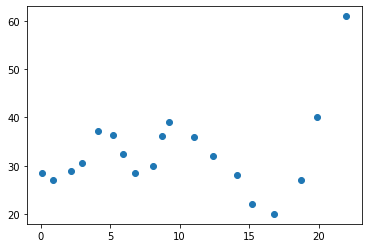

In [10]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

### First try linear regression 

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = x[:, np.newaxis]
Y = y[:, np.newaxis]
linear_reg = LinearRegression().fit(X, Y)
print(f'R2 score of linear regression model : {linear_reg.score(X, Y)}')
print(f'Coefficient : {linear_reg.coef_}')

R2 score of linear regression model : 0.0854638614857196
Coefficient : [[0.38472191]]


In [18]:
y_pred = linear_reg.predict(X)
print(f'Mean square error of linear regression model : {mean_squared_error(y, y_pred)}')

Mean square error of linear regression model : 66.21631777373393


### Try to use quadractic regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
print(X_poly)

[[1.0000e+00 1.0000e-01 1.0000e-02]
 [1.0000e+00 9.0000e-01 8.1000e-01]
 [1.0000e+00 2.2000e+00 4.8400e+00]
 [1.0000e+00 3.0000e+00 9.0000e+00]
 [1.0000e+00 4.1000e+00 1.6810e+01]
 [1.0000e+00 5.2000e+00 2.7040e+01]
 [1.0000e+00 5.9000e+00 3.4810e+01]
 [1.0000e+00 6.8000e+00 4.6240e+01]
 [1.0000e+00 8.1000e+00 6.5610e+01]
 [1.0000e+00 8.7000e+00 7.5690e+01]
 [1.0000e+00 9.2000e+00 8.4640e+01]
 [1.0000e+00 1.1000e+01 1.2100e+02]
 [1.0000e+00 1.2400e+01 1.5376e+02]
 [1.0000e+00 1.4100e+01 1.9881e+02]
 [1.0000e+00 1.5200e+01 2.3104e+02]
 [1.0000e+00 1.6800e+01 2.8224e+02]
 [1.0000e+00 1.8700e+01 3.4969e+02]
 [1.0000e+00 1.9900e+01 3.9601e+02]
 [1.0000e+00 2.2000e+01 4.8400e+02]]


In [22]:
quad_regression = LinearRegression()
quad_regression.fit(X_poly, y)
print(f'R2 Score of quadractic regression model : {quad_regression.score(X_poly, y)}')
print(f'Coefficient : {quad_regression.coef_}')

R2 Score of quadractic regression model : 0.18210575780279237
Coefficient : [ 0.         -1.07117391  0.06781837]


In [23]:
y_quad_pred = quad_regression.predict(X_poly)
print(f'Mean square error of quadractic regression model : {mean_squared_error(y, y_quad_pred)}')

Mean square error of quadractic regression model : 59.21903221300854


### Try polynomial regression from degree 6 , 8 and 10
I found that degree 10 is most suitable.  
I tried to increase degree greater than 10, however its improvement is quite little.  

In [25]:
from sklearn.pipeline import make_pipeline

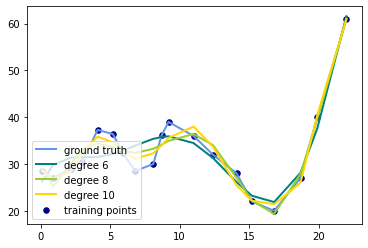

In [31]:
colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x, y, color = 'cornflowerblue', linewidth = lw, label = 'ground truth')
plt.scatter(x, y, color = 'navy', s = 30, marker='o', label = 'training points')
for count, degree in enumerate([6,8,10]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, Y)
    y_plot = model.predict(X)
    plt.plot(x, y_plot, color = colors[count], linewidth=lw, label = 'degree %d' % degree)
plt.legend(loc='lower left')
plt.show()